In [14]:
#SWR detecetion on virtual time series
import os
import mne
import numpy as np
import pandas as pd
import ast

from final_SWR_detection_function import detect_SWR



In [15]:
#input paths
base_path = "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS"
virtual_path = os.path.join(base_path, "virtual_time_series", "mag")
ied_dir = os.path.join(base_path, "IED_boolean_array")
swr_dir = os.path.join(base_path, "theta_times")
output_csv = os.path.join(base_path, "theta_virtual_vs_ieeg_sum.csv")



In [16]:
#closes channels dictionary
closest_channels_dict = {
    "patient_05_part1L_vertex3405": ["EEG026", "EEG028"],
    "patient_05_part1L_vertex3711": ["EEG057", "EEG059"],
    "patient_05_part1L_vertex3728": ["EEG032", "EEG034"],
    "patient_05_part1R_vertex3411": ["EEG028"],
    "patient_05_part1R_vertex3428": ["EEG003", "EEG026"],
    "patient_05_part1R_vertex3734": ["EEG032", "EEG034"],
    "patient_05_part2L_vertex3405": ["EEG026", "EEG028"],
    "patient_05_part2L_vertex3711": ["EEG057", "EEG059"],
    "patient_05_part2L_vertex3728": ["EEG032", "EEG034"],
    "patient_05_part2R_vertex3411": ["EEG028"],
    "patient_05_part2R_vertex3428": ["EEG003", "EEG026"],
    "patient_05_part2R_vertex3734": ["EEG032", "EEG034"],
    "patient_06_vertex2629": ["EEG003", "EEG004"],
    "patient_06_vertex2646": ["EEG001", "EEG002"],
    "patient_06_vertex2918": ["EEG007", "EEG008"],
    "patient_06_vertex2935": ["EEG005", "EEG006"],
    "patient_08_vertex2946": ["EEG026", "EEG027", "EEG028"],
    "patient_10_vertex3581": ["EEG013"],
    "patient_11_part1_vertex4097": ["EEG043", "EEG044", "EEG045"],
    "patient_11_part1_vertex4098": ["EEG046"],
    "patient_11_part2_vertex4097": ["EEG043", "EEG044", "EEG045"],
    "patient_11_part2_vertex4098": ["EEG046"],
    "patient_13_vertex3035": ["EEG036"],
    "patient_14_part1_left_vertex2486": ["EEG001"],
    "patient_14_part1_right_vertex3070": ["EEG041", "EEG042", "EEG043"],
    "patient_14_part2_left_vertex2486": ["EEG001"],
    "patient_14_part2_right_vertex3070": ["EEG041", "EEG042", "EEG043"],
    "patient_16_vertex4732": ["EEG003"],
    "patient_17_vertex4040": ["EEG003", "EEG004", "EEG005"],
    "patient_17_vertex4041": ["EEG006"],
    "patient_21_vertex3897": ["EEG003", "EEG004", "EEG005"],
    "patient_21_vertex3898": ["EEG002"],
    "patient_22_vertex2868": ["EEG003"],
    "patient_22_vertex2869": ["EEG001", "EEG002"],
    "patient_22_vertex3108": ["EEG022"],
    "patient_22_vertex3124": ["EEG018", "EEG019", "EEG020", "EEG021"],
    "patient_22_vertex3125": ["EEG017"],
    "patient_23_vertex3674": ["EEG057"],
    "patient_23_vertex3690": ["EEG058", "EEG059"],
    "patient_25_vertex5650": ["EEG050"],
    "patient_25_vertex5669": ["EEG049"]
}


In [17]:
ied_file_dict = {
        "patient_05_part1L": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient5_part1L.npz",
        "patient_05_part1R": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient5_part1R.npz",
        "patient_05_part2L": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient5_part2L.npz",
        "patient_05_part2R": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient5_part2R.npz",
        "patient_06": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient6.npz",
        "patient_08": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient8.npz",
        "patient_10": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient10.npz",
        "patient_11_part1": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient11_part1.npz",
        "patient_11_part2": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient11_part2.npz",
        "patient_13": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient13.npz",
        "patient_14_part1_left": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient14_part1.npz",
        "patient_14_part2_left": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient14_part2.npz",
        "patient_14_part1_right": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient14_part1.npz",
        "patient_14_part2_right": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient14_part2.npz",
        "patient_16": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient16.npz",
        "patient_17": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient17.npz",
        "patient_21": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient21.npz",
        "patient_22": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient22.npz",
        "patient_23": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient23.npz",
        "patient_25": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/IED_boolean_array/IED_boolean_patient25.npz",

}

In [18]:
swr_file_dict ={"patient_05_part1L": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part1L_SWRs.csv",
    "patient_05_part1R": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part1R_SWRs.csv",
    "patient_05_part2L": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part2L_SWRs.csv",
    "patient_05_part2R": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part2R_SWRs.csv",
    "patient_06": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient6_SWRs.csv",
    "patient_08": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient8_SWRs.csv",
    "patient_10": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient10_SWRs.csv",
    "patient_11_part1": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient11_part1_SWRs.csv",
    "patient_11_part2": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient11_part2_SWRs.csv",
    "patient_13": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient13_SWRs.csv",
    "patient_14_part1_left": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part1_SWRs.csv",
    "patient_14_part2_left": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part2_SWRs.csv",
    "patient_14_part1_right": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part1_SWRs.csv",
    "patient_14_part2_right": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part2_SWRs.csv",
    "patient_16": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient16_SWRs.csv",
    "patient_17": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient17_SWRs.csv",
    "patient_21": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient21_SWRs.csv",
    "patient_22": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient22_SWRs.csv",
    "patient_23": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient23_SWRs.csv",
    "patient_25": "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient25_SWRs.csv"
}

In [19]:
data_dropout_dict ={"patient_05_part1L": [],
    "patient_05_part1R": [],
    "patient_05_part2L":[],
    "patient_05_part2R": [],
    "patient_06": [],
    "patient_08": [(101000, 102000)],
    "patient_10": [(394000, 395000), (432000, 434000), (467000, 469000), (515000, 517000)],
    "patient_11_part1": [(74000, 76000), (111000, 112000), (207000, 208000), (28000, 282000)],
    "patient_11_part2": [(52000, 54000)],
    "patient_13":[] ,
    "patient_14_part1_left": [(169000, 171000), (296000, 298000)] ,
    "patient_14_part2_left": [(328000, 330000), (372000, 374000), (398000, 400000)],
    "patient_14_part1_right":[(169000, 171000), (296000, 298000)] ,
    "patient_14_part2_right":[(328000, 330000), (372000, 374000), (398000, 400000)],
    "patient_16": [],
    "patient_17": [],
    "patient_21": [(41000, 43000), (268000, 270000)],
    "patient_22": [],
    "patient_23":[],
    "patient_25": []
}

In [20]:
#ripple detection paramteres
gaussFilt = 15 #standard diviation of Gaussian smoothing filter (ms)??
zThresh = 2 #peak Z-score for candiate events (SDs)
durTresh = [0.01, 0.1 ]#minimum/maximum duration threshold for candidate evnts (seconds)
rippleBand = [80, 150] #ripple band (Hz)
tolerance = 0.05 #50ms for tolerance of overlap

In [21]:
results = []
current_subject = None
ied_bool_arrays = None
swr_df = None

In [22]:
for filename in os.listdir(virtual_path):
    if not filename.endswith("_virtual_ts.fif"):
        continue

    filepath = os.path.join(virtual_path, filename)

    #get base key for the nearest channels
    base_key = filename.replace("_virtual_ts.fif", "") 

    #get subject key for correct ied and swr files
    subject_key_parts = base_key.split("_vertex")[0].split("_")
    subject_key = "_".join(subject_key_parts[:4]) if "part" in base_key else "_".join(subject_key_parts[:2])
 
    #load IED file
    if subject_key != current_subject:
        if subject_key in ied_file_dict:
            ied_path = ied_file_dict[subject_key]
            ied_bool_arrays = np.load(ied_path)
            current_subject = subject_key
        else:
            print(f"no IED file for {subject_key}")
            continue
    
    #load SWR file
    if subject_key in swr_file_dict:  
        swr_df = pd.read_csv(swr_file_dict[subject_key])
        swr_df['rippleTime'] = swr_df['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))
        #swr_df['rippleTime'] = swr_df['rippleTime'].apply(eval).apply(lambda lst: [np.array(seg) for seg in lst]).tolist()
    else:
        print(f"no SWR file for {subject_key}")
        continue

    #load virtual electrode series
    raw = mne.io.read_raw_fif(filepath, preload=True)
    raw.set_channel_types({raw.ch_names[0]: 'misc'})
    data = raw.get_data()
    sfreq = raw.info['sfreq']
    data_dropout = data_dropout_dict[subject_key]
    

    #loop thorugh the nearest channels
    for ch in closest_channels_dict[base_key]:
        ied_bool = ied_bool_arrays[ch]
        output = detect_SWR(data, sfreq, ied_bool, data_dropout, rippleBand=rippleBand, gaussFilt=gaussFilt,
                    zThresh=zThresh, durTresh=durTresh)
        n_ve = output["nEvents"]
        ripple_times = output["rippleTime"]

        row = swr_df[swr_df["Channel"] == ch]
        n_ieeg = int(row["nEvents"].values[0]) if not row.empty else 0
        swr_times_ieeg = row["rippleTime"].values[0] if not row.empty else []
        ieeg_durations = row['durations'].values[0] if 'durations' in row else []

        #results
        results.append({
                "subject": subject_key,
                "vertex": base_key.split("_vertex")[1],
                "channel": ch,
                "virtual_SWRs": n_ve,
                "iEEG_SWRs": n_ieeg,
                "vitual_ripple_times": ripple_times,
                "iEEG_ripple_times": swr_times_ieeg,
                "iEEG_ripple_durations": ieeg_durations
            })
        

        print(f"{base_key} → {ch}: Virtual = {n_ve}, iEEG = {n_ieeg}")



    

Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part1_right_vertex3070_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 451999 =      0.000 ...   451.999 secs
Ready.
Reading 0 ... 451999  =      0.000 ...   451.999 secs...
patient_14_part1_right_vertex3070 → EEG041: Virtual = 26, iEEG = 87


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part1_right_vertex3070_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_14_part1_right_vertex3070 → EEG042: Virtual = 26, iEEG = 74
patient_14_part1_right_vertex3070 → EEG043: Virtual = 26, iEEG = 78
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part1_vertex4098_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 430999 =      0.000 ...   430.999 secs
Ready.
Reading 0 ... 430999  =      0.000 ...   430.999 secs...
patient_11_part1_vertex4098 → EEG046: Virtual = 38, iEEG = 83
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3411_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 256999 =      0.000 ...   256.999 secs
Ready.
Reading 0 ... 256999  =      0.000 ...   256.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part1_vertex4098_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3411_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=Tru

patient_05_part2R_vertex3411 → EEG028: Virtual = 153, iEEG = 75
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex2868_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 613999 =      0.000 ...   613.999 secs
Ready.
Reading 0 ... 613999  =      0.000 ...   613.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex2868_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_22_vertex2868 → EEG003: Virtual = 217, iEEG = 104
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part1_vertex4097_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 430999 =      0.000 ...   430.999 secs
Ready.
Reading 0 ... 430999  =      0.000 ...   430.999 secs...
patient_11_part1_vertex4097 → EEG043: Virtual = 34, iEEG = 75


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part1_vertex4097_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_11_part1_vertex4097 → EEG044: Virtual = 34, iEEG = 92
patient_11_part1_vertex4097 → EEG045: Virtual = 34, iEEG = 80
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3711_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 357999 =      0.000 ...   357.999 secs
Ready.
Reading 0 ... 357999  =      0.000 ...   357.999 secs...
patient_05_part1L_vertex3711 → EEG057: Virtual = 201, iEEG = 124


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3711_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1L_vertex3711 → EEG059: Virtual = 201, iEEG = 98
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_13_vertex3035_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 242999 =      0.000 ...   242.999 secs
Ready.
Reading 0 ... 242999  =      0.000 ...   242.999 secs...
patient_13_vertex3035 → EEG036: Virtual = 132, iEEG = 79
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part2_left_vertex2486_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 496999 =      0.000 ...   496.999 secs
Ready.
Reading 0 ... 496999  =      0.000 ...   496.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_13_vertex3035_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part2_left_vertex2486_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)

patient_14_part2_left_vertex2486 → EEG001: Virtual = 17, iEEG = 36
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3728_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 292999 =      0.000 ...   292.999 secs
Ready.
Reading 0 ... 292999  =      0.000 ...   292.999 secs...
patient_05_part2L_vertex3728 → EEG032: Virtual = 156, iEEG = 102


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3728_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part2L_vertex3728 → EEG034: Virtual = 155, iEEG = 105
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_08_vertex2946_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 574999 =      0.000 ...   574.999 secs
Ready.
Reading 0 ... 574999  =      0.000 ...   574.999 secs...
patient_08_vertex2946 → EEG026: Virtual = 110, iEEG = 157


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_08_vertex2946_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_08_vertex2946 → EEG027: Virtual = 110, iEEG = 134
patient_08_vertex2946 → EEG028: Virtual = 110, iEEG = 128
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2918_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 413999 =      0.000 ...   413.999 secs
Ready.
Reading 0 ... 413999  =      0.000 ...   413.999 secs...
patient_06_vertex2918 → EEG007: Virtual = 192, iEEG = 90


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2918_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_06_vertex2918 → EEG008: Virtual = 193, iEEG = 107
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex2869_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 613999 =      0.000 ...   613.999 secs
Ready.
Reading 0 ... 613999  =      0.000 ...   613.999 secs...
patient_22_vertex2869 → EEG001: Virtual = 185, iEEG = 134

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex2869_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)



patient_22_vertex2869 → EEG002: Virtual = 185, iEEG = 112
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_25_vertex5669_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 255999 =      0.000 ...   255.999 secs
Ready.
Reading 0 ... 255999  =      0.000 ...   255.999 secs...
patient_25_vertex5669 → EEG049: Virtual = 60, iEEG = 10


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_25_vertex5669_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_10_vertex3581_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 626999 =      0.000 ...   626.999 secs
Ready.
Reading 0 ... 626999  =      0.000 ...   626.999 secs...
patient_10_vertex3581 → EEG013: Virtual = 13, iEEG = 94


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_10_vertex3581_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3428_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 312999 =      0.000 ...   312.999 secs
Ready.
Reading 0 ... 312999  =      0.000 ...   312.999 secs...
patient_05_part1R_vertex3428 → EEG003: Virtual = 189, iEEG = 99


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3428_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1R_vertex3428 → EEG026: Virtual = 190, iEEG = 95
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3405_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 292999 =      0.000 ...   292.999 secs
Ready.
Reading 0 ... 292999  =      0.000 ...   292.999 secs...
patient_05_part2L_vertex3405 → EEG026: Virtual = 160, iEEG = 41


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3405_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part2L_vertex3405 → EEG028: Virtual = 160, iEEG = 67
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3125_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 613999 =      0.000 ...   613.999 secs
Ready.
Reading 0 ... 613999  =      0.000 ...   613.999 secs...
patient_22_vertex3125 → EEG017: Virtual = 222, iEEG = 110

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3125_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)



Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part2_right_vertex3070_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 496999 =      0.000 ...   496.999 secs
Ready.
Reading 0 ... 496999  =      0.000 ...   496.999 secs...
patient_14_part2_right_vertex3070 → EEG041: Virtual = 14, iEEG = 34


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part2_right_vertex3070_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_14_part2_right_vertex3070 → EEG042: Virtual = 14, iEEG = 15
patient_14_part2_right_vertex3070 → EEG043: Virtual = 14, iEEG = 10
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3124_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 613999 =      0.000 ...   613.999 secs
Ready.
Reading 0 ... 613999  =      0.000 ...   613.999 secs...
patient_22_vertex3124 → EEG018: Virtual = 255, iEEG = 137

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3124_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)



patient_22_vertex3124 → EEG019: Virtual = 257, iEEG = 141
patient_22_vertex3124 → EEG020: Virtual = 257, iEEG = 98
patient_22_vertex3124 → EEG021: Virtual = 258, iEEG = 97
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3734_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 256999 =      0.000 ...   256.999 secs
Ready.
Reading 0 ... 256999  =      0.000 ...   256.999 secs...
patient_05_part2R_vertex3734 → EEG032: Virtual = 152, iEEG = 80
patient_05_part2R_vertex3734 → EEG034: Virtual = 152, iEEG = 82


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3734_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_23_vertex3674_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 757999 =      0.000 ...   757.999 secs
Ready.
Reading 0 ... 757999  =      0.000 ...   757.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_23_vertex3674_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_23_vertex3674 → EEG057: Virtual = 273, iEEG = 104
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3728_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 357999 =      0.000 ...   357.999 secs
Ready.
Reading 0 ... 357999  =      0.000 ...   357.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3728_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1L_vertex3728 → EEG032: Virtual = 203, iEEG = 126
patient_05_part1L_vertex3728 → EEG034: Virtual = 201, iEEG = 120
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2629_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 413999 =      0.000 ...   413.999 secs
Ready.
Reading 0 ... 413999  =      0.000 ...   413.999 secs...
patient_06_vertex2629 → EEG003: Virtual = 148, iEEG = 87


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2629_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_06_vertex2629 → EEG004: Virtual = 149, iEEG = 89
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_21_vertex3898_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 352999 =      0.000 ...   352.999 secs
Ready.
Reading 0 ... 352999  =      0.000 ...   352.999 secs...
patient_21_vertex3898 → EEG002: Virtual = 0, iEEG = 33


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_21_vertex3898_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_21_vertex3897_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 352999 =      0.000 ...   352.999 secs
Ready.
Reading 0 ... 352999  =      0.000 ...   352.999 secs...
patient_21_vertex3897 → EEG003: Virtual = 0, iEEG = 19


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_21_vertex3897_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_21_vertex3897 → EEG004: Virtual = 0, iEEG = 41
patient_21_vertex3897 → EEG005: Virtual = 0, iEEG = 42
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3428_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 256999 =      0.000 ...   256.999 secs
Ready.
Reading 0 ... 256999  =      0.000 ...   256.999 secs...
patient_05_part2R_vertex3428 → EEG003: Virtual = 132, iEEG = 96
patient_05_part2R_vertex3428 → EEG026: Virtual = 132, iEEG = 73


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2R_vertex3428_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2935_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 413999 =      0.000 ...   413.999 secs
Ready.
Reading 0 ... 413999  =      0.000 ...   413.999 secs...
patient_06_vertex2935 → EEG005: Virtual = 175, iEEG = 81


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2935_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_06_vertex2935 → EEG006: Virtual = 175, iEEG = 93
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_17_vertex4041_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 187999 =      0.000 ...   187.999 secs
Ready.
Reading 0 ... 187999  =      0.000 ...   187.999 secs...
patient_17_vertex4041 → EEG006: Virtual = 82, iEEG = 52


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_17_vertex4041_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_23_vertex3690_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 757999 =      0.000 ...   757.999 secs
Ready.
Reading 0 ... 757999  =      0.000 ...   757.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_23_vertex3690_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_23_vertex3690 → EEG058: Virtual = 303, iEEG = 195
patient_23_vertex3690 → EEG059: Virtual = 302, iEEG = 190
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_25_vertex5650_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 255999 =      0.000 ...   255.999 secs
Ready.
Reading 0 ... 255999  =      0.000 ...   255.999 secs...
patient_25_vertex5650 → EEG050: Virtual = 67, iEEG = 13
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3411_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 312999 =      0.000 ...   312.999 secs
Ready.
Reading 0 ... 312999  =      0.000 ...   312.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_25_vertex5650_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3411_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1R_vertex3411 → EEG028: Virtual = 162, iEEG = 106
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part2_vertex4097_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 351999 =      0.000 ...   351.999 secs
Ready.
Reading 0 ... 351999  =      0.000 ...   351.999 secs...
patient_11_part2_vertex4097 → EEG043: Virtual = 28, iEEG = 39
patient_11_part2_vertex4097 → EEG044: Virtual = 28, iEEG = 47


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part2_vertex4097_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_11_part2_vertex4097 → EEG045: Virtual = 28, iEEG = 44
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_17_vertex4040_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 187999 =      0.000 ...   187.999 secs
Ready.
Reading 0 ... 187999  =      0.000 ...   187.999 secs...
patient_17_vertex4040 → EEG003: Virtual = 89, iEEG = 30
patient_17_vertex4040 → EEG004: Virtual = 89, iEEG = 44
patient_17_vertex4040 → EEG005: Virtual = 89, iEEG = 54


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_17_vertex4040_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part2_vertex4098_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 351999 =      0.000 ...   351.999 secs
Ready.
Reading 0 ... 351999  =      0.000 ...   351.999 secs...
patient_11_part2_vertex4098 → EEG046: Virtual = 36, iEEG = 19
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3711_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 292999 =      0.000 ...   292.999 secs
Ready.
Reading 0 ... 292999  =      0.000 ...   292.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_11_part2_vertex4098_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part2L_vertex3711_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=Tru

patient_05_part2L_vertex3711 → EEG057: Virtual = 155, iEEG = 102
patient_05_part2L_vertex3711 → EEG059: Virtual = 158, iEEG = 104
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2646_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 413999 =      0.000 ...   413.999 secs
Ready.
Reading 0 ... 413999  =      0.000 ...   413.999 secs...
patient_06_vertex2646 → EEG001: Virtual = 146, iEEG = 86
patient_06_vertex2646 → EEG002: Virtual = 146, iEEG = 93


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_06_vertex2646_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3734_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 312999 =      0.000 ...   312.999 secs
Ready.
Reading 0 ... 312999  =      0.000 ...   312.999 secs...
patient_05_part1R_vertex3734 → EEG032: Virtual = 176, iEEG = 87


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1R_vertex3734_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1R_vertex3734 → EEG034: Virtual = 176, iEEG = 99
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_16_vertex4732_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 180999 =      0.000 ...   180.999 secs
Ready.
Reading 0 ... 180999  =      0.000 ...   180.999 secs...
patient_16_vertex4732 → EEG003: Virtual = 18, iEEG = 37
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3405_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 357999 =      0.000 ...   357.999 secs
Ready.
Reading 0 ... 357999  =      0.000 ...   357.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_16_vertex4732_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_05_part1L_vertex3405_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_05_part1L_vertex3405 → EEG026: Virtual = 206, iEEG = 61
patient_05_part1L_vertex3405 → EEG028: Virtual = 206, iEEG = 83
Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part1_left_vertex2486_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 451999 =      0.000 ...   451.999 secs
Ready.
Reading 0 ... 451999  =      0.000 ...   451.999 secs...
patient_14_part1_left_vertex2486 → EEG001: Virtual = 29, iEEG = 72


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_14_part1_left_vertex2486_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Opening raw data file /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3108_virtual_ts.fif...
Isotrak not found
    Range : 0 ... 613999 =      0.000 ...   613.999 secs
Ready.
Reading 0 ... 613999  =      0.000 ...   613.999 secs...


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65947/762799685.py:34: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/virtual_time_series/mag/patient_22_vertex3108_virtual_ts.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


patient_22_vertex3108 → EEG022: Virtual = 257, iEEG = 102


In [23]:
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)
print(f"Saved results to: {output_csv}")

Saved results to: /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/theta_virtual_vs_ieeg_sum.csv


Overall Pearson Correlation (all data): r = 0.72, p = 5.249e-13


<bound method Axes.set of <Axes: title={'center': 'Correlation between detected SWRs\nPearson r = 0.72, p < 0.001'}, xlabel='iEEG SWR Count', ylabel='Virtual Electrode SWR Count'>>

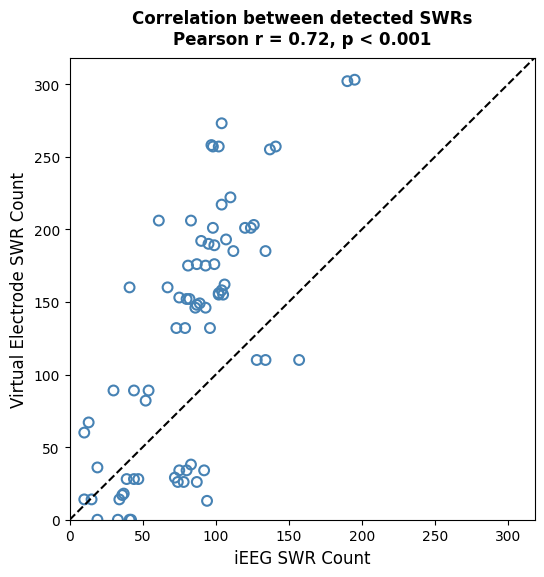

In [31]:
#coorelation between number of detected events
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Style settings to match your paper figures ---
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10

# --- Calculate Pearson correlation ---
r, p = pearsonr(df["iEEG_SWRs"], df["virtual_SWRs"])
print(f"Overall Pearson Correlation (all data): r = {r:.2f}, p = {p:.3e}")

# --- Plot ---
fig, ax = plt.subplots(figsize=(6,6))

# Scatter plot with steelblue hollow markers
ax.scatter(df["iEEG_SWRs"], df["virtual_SWRs"], 
           facecolors='none', edgecolors='steelblue', s=50, linewidth=1.5)

# Identity line (y = x)
max_val = max(df["iEEG_SWRs"].max(), df["virtual_SWRs"].max()) * 1.05
ax.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=1.5)

# Axis labels
ax.set_xlabel("iEEG SWR Count")
ax.set_ylabel("Virtual Electrode SWR Count")

# Bold Title (centered automatically by matplotlib)
ax.set_title(f"Correlation between detected SWRs\nPearson r = {r:.2f}, p < 0.001", fontweight='bold', fontsize=12, pad=10)

# Adjust plot limits and aspect
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
ax.set


In [32]:
#compute jaccar index

#need sampling frew
eeg_fs = 1000

#need durations
recording_durations = {
    "patient_05_part1L": 358,
    "patient_05_part1R": 313,
    "patient_05_part2L": 293,
    "patient_05_part2R": 257,
    "patient_06": 414,
    "patient_08": 575,
    "patient_10": 627,
    "patient_11_part1": 431,
    "patient_11_part2": 352,
    "patient_13": 243,
    "patient_14_part1_left": 452,
    "patient_14_part1_right": 452,
    "patient_14_part2_left": 497,
    "patient_14_part2_right": 497,
    "patient_16": 181,
    "patient_17": 188,
    "patient_21": 353,
    "patient_22": 614,
    "patient_23": 758,
    "patient_25": 256
}

def ripple_times_to_array(ripple_times, eeg_fs, eeg_num_samples):
    swr_array = np.zeros(eeg_num_samples, dtype=int)
    if ripple_times is not None and np.size(ripple_times) > 0:
        ripple_indices = np.round(np.array(ripple_times) * eeg_fs).astype(int)
        ripple_indices = ripple_indices[(ripple_indices >= 0) & (ripple_indices < eeg_num_samples)]
        swr_array[ripple_indices] = 1
    return swr_array

jaccard_results = []

for idx, row in df.iterrows():
    subject = row['subject']
    eeg_duration_seconds = recording_durations[subject]
    eeg_num_samples = int(eeg_fs * eeg_duration_seconds)

    if isinstance(row['vitual_ripple_times'], str):
        virtual_times = np.concatenate(eval(row['vitual_ripple_times'], {'array': np.array})) if row['vitual_ripple_times'] else []
    else:
        virtual_times = np.concatenate(row['vitual_ripple_times']) if row['vitual_ripple_times'] else []

    if isinstance(row['iEEG_ripple_times'], str):
        ieeg_times = np.concatenate(eval(row['iEEG_ripple_times'], {'array': np.array})) if row['iEEG_ripple_times'] else []
    else:
        ieeg_times = np.concatenate(row['iEEG_ripple_times']) if row['iEEG_ripple_times'] else []

    swr_array_virtual = ripple_times_to_array(virtual_times, eeg_fs, eeg_num_samples)
    swr_array_ieeg = ripple_times_to_array(ieeg_times, eeg_fs, eeg_num_samples)

    intersection = np.sum(swr_array_virtual & swr_array_ieeg)
    union = np.sum(swr_array_virtual | swr_array_ieeg)

    jaccard_index = intersection / union if union > 0 else 0
    jaccard_results.append(jaccard_index)

    print(f"Subject {subject}, channel {row['channel']}: Jaccard Index = {jaccard_index:.3f}")


df['jaccard_index'] = jaccard_results
df.to_csv('/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/mag_virtual_vs_ieeg_sum_with_jaccard.csv', index=False)



Subject patient_14_part1_right, channel EEG041: Jaccard Index = 0.004
Subject patient_14_part1_right, channel EEG042: Jaccard Index = 0.005
Subject patient_14_part1_right, channel EEG043: Jaccard Index = 0.005
Subject patient_11_part1, channel EEG046: Jaccard Index = 0.000
Subject patient_05_part2R, channel EEG028: Jaccard Index = 0.015
Subject patient_22, channel EEG003: Jaccard Index = 0.010
Subject patient_11_part1, channel EEG043: Jaccard Index = 0.009
Subject patient_11_part1, channel EEG044: Jaccard Index = 0.008
Subject patient_11_part1, channel EEG045: Jaccard Index = 0.016
Subject patient_05_part1L, channel EEG057: Jaccard Index = 0.026
Subject patient_05_part1L, channel EEG059: Jaccard Index = 0.011
Subject patient_13, channel EEG036: Jaccard Index = 0.014
Subject patient_14_part2_left, channel EEG001: Jaccard Index = 0.000
Subject patient_05_part2L, channel EEG032: Jaccard Index = 0.010
Subject patient_05_part2L, channel EEG034: Jaccard Index = 0.016
Subject patient_08, chan

In [33]:
#do a permutation test
n_shuffles = 1000

#function to generate random arrays
def generate_shuffled_array(real_durations, eeg_fs, eeg_duration_seconds, eeg_num_samples):
    swr_array = np.zeros(eeg_num_samples, dtype=int)
    for duration in real_durations:
        random_start = np.random.uniform(0, eeg_duration_seconds)
        start_idx = int(random_start * eeg_fs)
        end_idx = int((random_start + duration) * eeg_fs)
        end_idx = min(end_idx, eeg_num_samples)
        swr_array[start_idx:end_idx] = 1
    return swr_array


shuffle_results = []
all_percentiles = []
all_pvalues =[]

for idx, row in df.iterrows():
    subject = row['subject']
    eeg_duration_seconds = recording_durations[subject]
    eeg_num_samples = int(eeg_fs * eeg_duration_seconds)

    # Load ripple times 
    if isinstance(row['vitual_ripple_times'], str):
        virtual_times = np.concatenate(eval(row['vitual_ripple_times'], {'array': np.array})) if row['vitual_ripple_times'] else []
    else:
        virtual_times = np.concatenate(row['vitual_ripple_times']) if row['vitual_ripple_times'] else []

    if isinstance(row['iEEG_ripple_times'], str):
        ieeg_times = np.concatenate(eval(row['iEEG_ripple_times'], {'array': np.array})) if row['iEEG_ripple_times'] else []
    else:
        ieeg_times = np.concatenate(row['iEEG_ripple_times']) if row['iEEG_ripple_times'] else []
    
    if isinstance(row['iEEG_ripple_durations'], str):
        ripple_durations = np.array([float(x) for x in row['iEEG_ripple_durations'].replace('[', '').replace(']', '').split()])
    else:
        ripple_durations = np.array(row['iEEG_ripple_durations']) if row['iEEG_ripple_durations'] else []

    swr_array_virtual = ripple_times_to_array(virtual_times, eeg_fs, eeg_num_samples)
    swr_array_ieeg = ripple_times_to_array(ieeg_times, eeg_fs, eeg_num_samples)

    #get the actuall jaccard index
    true_jaccard = row['jaccard_index']

    
    #shuffle
    shuffled_jaccards = []
    for _ in range(n_shuffles):
        swr_array_shuffled_ieeg = generate_shuffled_array(
            ripple_durations,
            eeg_fs,
            eeg_duration_seconds,
            eeg_num_samples
        )

        intersection = np.sum(swr_array_virtual & swr_array_shuffled_ieeg)
        union = np.sum(swr_array_virtual | swr_array_shuffled_ieeg)

        jaccard_shuffle = intersection / union if union > 0 else 0
        shuffled_jaccards.append(jaccard_shuffle)
    
    #percentiles and p-values
    percentile = (np.sum(np.array(shuffled_jaccards) < true_jaccard) / n_shuffles) * 100
    p_value = (np.sum(np.array(shuffled_jaccards) >= true_jaccard) + 1) / (n_shuffles + 1) 

    shuffle_results.append(shuffled_jaccards)
    all_percentiles.append(percentile)
    all_pvalues.append(p_value)

    #print the results
    print(f"Subject {subject}, channel {row['channel']}: True Jaccard = {true_jaccard:.3f}, Percentile = {percentile:.1f}%, p-value = {p_value:.4f}")


# Save percentile and p-values
df['percentile'] = all_percentiles
df['p_value'] = all_pvalues
df.to_csv('/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/mag_virtual_vs_ieeg_sum_with_jaccard_and_shuffle.csv', index=False)





Subject patient_14_part1_right, channel EEG041: True Jaccard = 0.004, Percentile = 63.9%, p-value = 0.3616
Subject patient_14_part1_right, channel EEG042: True Jaccard = 0.005, Percentile = 71.1%, p-value = 0.2897
Subject patient_14_part1_right, channel EEG043: True Jaccard = 0.005, Percentile = 69.8%, p-value = 0.3027
Subject patient_11_part1, channel EEG046: True Jaccard = 0.000, Percentile = 0.0%, p-value = 1.0000
Subject patient_05_part2R, channel EEG028: True Jaccard = 0.015, Percentile = 49.8%, p-value = 0.5025
Subject patient_22, channel EEG003: True Jaccard = 0.010, Percentile = 58.8%, p-value = 0.4126
Subject patient_11_part1, channel EEG043: True Jaccard = 0.009, Percentile = 85.8%, p-value = 0.1429
Subject patient_11_part1, channel EEG044: True Jaccard = 0.008, Percentile = 80.8%, p-value = 0.1928
Subject patient_11_part1, channel EEG045: True Jaccard = 0.016, Percentile = 97.5%, p-value = 0.0260
Subject patient_05_part1L, channel EEG057: True Jaccard = 0.026, Percentile = 9

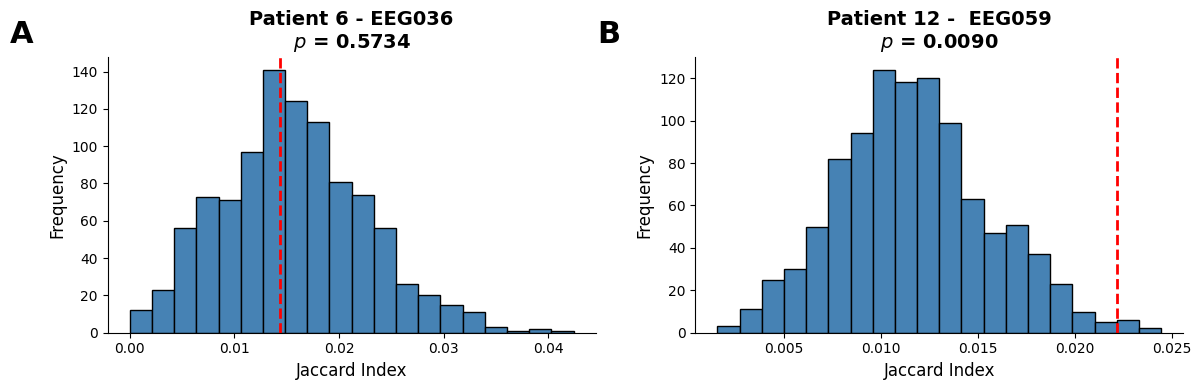

In [38]:
#do some plots
import matplotlib.pyplot as plt



# Define which 4 indices you want to plot (example: pick manually)
selected_indices = [11, 53 ]  #66, 28]  # <--- Change these to the specific indices you want

custom_titles = [
    "Patient 6 - EEG036",
    "Patient 12 -  EEG059",
    #"Patient 2 - EEG002",
    #"Patient 11 - EEG017"
]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, idx, panel_label, custom_title in zip(axes.flat, selected_indices, ['A', 'B', 'C', 'D'], custom_titles):
    shuffled_jaccards = shuffle_results[idx]   
    true_jaccard = df.loc[idx, 'jaccard_index']
    p_value = df.loc[idx, 'p_value']

    # Plot histogram
    ax.hist(shuffled_jaccards, bins=20, color='steelblue', edgecolor='black')

    # Plot true Jaccard line
    ax.axvline(true_jaccard, color='red', linestyle='--', linewidth=2)

    # Manual title + p-value
    ax.set_title(f'{custom_title}\n$p$ = {p_value:.4f}', fontsize=14, fontweight='bold')

    # Axis labels
    ax.set_xlabel('Jaccard Index', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Panel label (A, B, C, D)
    ax.text(-0.2, 1.05, panel_label, transform=ax.transAxes, fontsize=22, fontweight='bold')

    # Clean up axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

# Final layout
plt.tight_layout()
plt.show()